In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [6]:

from google.colab import files

# Upload dataset file to Google Colab
uploaded = files.upload()


Saving exasens.zip to exasens (1).zip


In [7]:
# Read the dataset into a Pandas DataFrame
exasens_df = pd.read_csv('exasens.zip')


In [8]:
# Drop columns with no useful information
exasens_df = exasens_df.drop(columns=['Unnamed: 9', 'Unnamed: 10'])

# Display unique values in columns "Unnamed: 11" and "Unnamed: 12"
print("Unique values in Unnamed: 11:", exasens_df["Unnamed: 11"].unique())
print("Unique values in Unnamed: 12:", exasens_df["Unnamed: 12"].unique())

Unique values in Unnamed: 11: [nan 'Gender ' 'Male=1' 'Female=0']
Unique values in Unnamed: 12: [nan 'Somking' 'Non-smoker=1' 'Ex-smoker=2' 'Active-smoker=3']


In [9]:
# Map values in column "Unnamed: 11" to meaningful labels
exasens_df["Gender"] = exasens_df["Unnamed: 11"].map({"Male=1": "Male", "Female=0": "Female"})

# Map values in column "Unnamed: 12" to meaningful labels
exasens_df["Smoking Status"] = exasens_df["Unnamed: 12"].map({"Non-smoker=1": "Non-smoker",
                                                             "Ex-smoker=2": "Ex-smoker",
                                                             "Active-smoker=3": "Active-smoker"})

# Drop the original columns "Unnamed: 11" and "Unnamed: 12"
exasens_df = exasens_df.drop(columns=["Unnamed: 11", "Unnamed: 12"])
# Drop the original column "Unnamed: 3"
exasens_df = exasens_df.drop(columns=["Unnamed: 3"])

# Handle missing values in the "Gender" and "Smoking Status" columns
exasens_df["Gender"] = exasens_df["Gender"].fillna("Unknown")
exasens_df["Smoking Status"] = exasens_df["Smoking Status"].fillna("Unknown")

# Display the updated DataFrame
print(exasens_df.head())
num_columns = exasens_df.shape[1]
print("Number of columns in the DataFrame:", num_columns)
# Select relevant columns for clustering
data = exasens_df[['Imaginary Part', 'Real Part', 'Age', 'Smoking']]

# Drop rows with any missing values
data = data.dropna()

# Display the first few rows of the data
print(data.head())


  Diagnosis     ID Imaginary Part Real Part    Unnamed: 5   Gender   Age  \
0       NaN    NaN            NaN       NaN           NaN  Unknown   NaN   
1       NaN    NaN           Min       Min          Avg.   Unknown   NaN   
2      COPD  301-4        -320.61   -495.26  -464.1719907     Male  77.0   
3      COPD  302-3        -325.39   -473.73  -469.2631404   Female  72.0   
4      COPD  303-3           -323   -476.12  -471.8976667  Unknown  73.0   

   Smoking Smoking Status  
0      NaN        Unknown  
1      NaN        Unknown  
2      2.0     Non-smoker  
3      2.0      Ex-smoker  
4      3.0  Active-smoker  
Number of columns in the DataFrame: 9
  Imaginary Part Real Part   Age  Smoking
2        -320.61   -495.26  77.0      2.0
3        -325.39   -473.73  72.0      2.0
4           -323   -476.12  73.0      3.0
5        -327.78   -473.73  76.0      2.0
6        -325.39   -478.52  65.0      2.0


In [11]:
from sklearn.cluster import MeanShift

# Define cluster sizes
cluster_sizes = [3, 4, 5]

# Loop over cluster sizes
for n_clusters in cluster_sizes:
    # Mean Shift clustering with original data and specific cluster size
    meanshift = MeanShift()
    meanshift.fit(data)
    labels = meanshift.labels_
    silhouette_score_case1 = silhouette_score(data, labels)
    calinski_harabasz_score_case1 = calinski_harabasz_score(data, labels)
    davies_bouldin_score_case1 = davies_bouldin_score(data, labels)

    print(f"Cluster Size: {n_clusters}")
    print("Silhouette Score:", silhouette_score_case1)
    print("Calinski-Harabasz Score:", calinski_harabasz_score_case1)
    print("Davies-Bouldin Score:", davies_bouldin_score_case1)
    print()


Cluster Size: 3
Silhouette Score: 0.6855317105485617
Calinski-Harabasz Score: 153.4338250778248
Davies-Bouldin Score: 0.267303856974941

Cluster Size: 4
Silhouette Score: 0.6855317105485617
Calinski-Harabasz Score: 153.4338250778248
Davies-Bouldin Score: 0.267303856974941

Cluster Size: 5
Silhouette Score: 0.6855317105485617
Calinski-Harabasz Score: 153.4338250778248
Davies-Bouldin Score: 0.267303856974941



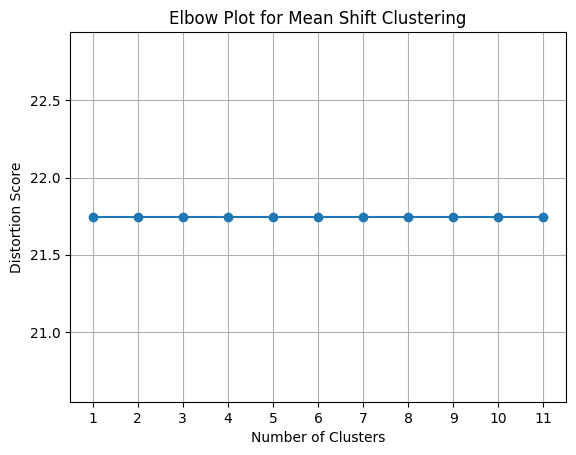

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.metrics import pairwise_distances_argmin_min

# Define cluster sizes
cluster_sizes = np.arange(1, 12)

# Initialize list to store distortion scores
distortion_scores = []

# Loop over cluster sizes
for n_clusters in cluster_sizes:
    # Mean Shift clustering
    meanshift = MeanShift()
    meanshift.fit(data)

    # Find cluster centers
    cluster_centers = meanshift.cluster_centers_

    # Compute distances from each point to its nearest cluster center
    distances = pairwise_distances_argmin_min(data, cluster_centers)[1]

    # Compute distortion score
    distortion_score = np.mean(distances)

    # Append distortion score to list
    distortion_scores.append(distortion_score)

# Plot the elbow plot
plt.plot(cluster_sizes, distortion_scores, marker='o')
plt.title('Elbow Plot for Mean Shift Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion Score')
plt.xticks(cluster_sizes)
plt.grid(True)
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Step 1: Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Step 2: Define cluster sizes
cluster_sizes = [3, 4, 5]

# Step 3: Perform Mean Shift clustering and compute evaluation scores for each cluster size
for n_clusters in cluster_sizes:
    # Mean Shift clustering with normalized data
    meanshift = MeanShift()
    meanshift.fit(data_normalized)
    labels = meanshift.labels_

    # Compute evaluation scores
    silhouette_score_case2 = silhouette_score(data_normalized, labels)
    calinski_harabasz_score_case2 = calinski_harabasz_score(data_normalized, labels)
    davies_bouldin_score_case2 = davies_bouldin_score(data_normalized, labels)

    # Print evaluation scores
    print(f"Cluster Size: {n_clusters}")
    print("Silhouette Score:", silhouette_score_case2)
    print("Calinski-Harabasz Score:", calinski_harabasz_score_case2)
    print("Davies-Bouldin Score:", davies_bouldin_score_case2)
    print()


Cluster Size: 3
Silhouette Score: 0.45583582588001575
Calinski-Harabasz Score: 24.864785084373093
Davies-Bouldin Score: 0.43190867185624926

Cluster Size: 4
Silhouette Score: 0.45583582588001575
Calinski-Harabasz Score: 24.864785084373093
Davies-Bouldin Score: 0.43190867185624926

Cluster Size: 5
Silhouette Score: 0.45583582588001575
Calinski-Harabasz Score: 24.864785084373093
Davies-Bouldin Score: 0.43190867185624926



In [14]:
from sklearn.manifold import TSNE

# Step 1: Apply t-SNE to reduce the dimensionality of the data
tsne = TSNE(n_components=2, random_state=42)
data_transformed = tsne.fit_transform(data)

# Step 2: Define cluster sizes
cluster_sizes = [3, 4, 5]

# Step 3: Perform Mean Shift clustering and compute evaluation scores for each cluster size
for n_clusters in cluster_sizes:
    # Mean Shift clustering with transformed data
    meanshift = MeanShift()
    meanshift.fit(data_transformed)
    labels = meanshift.labels_

    # Compute evaluation scores
    silhouette_score_case3 = silhouette_score(data_transformed, labels)
    calinski_harabasz_score_case3 = calinski_harabasz_score(data_transformed, labels)
    davies_bouldin_score_case3 = davies_bouldin_score(data_transformed, labels)

    # Print evaluation scores
    print(f"Cluster Size: {n_clusters}")
    print("Silhouette Score:", silhouette_score_case3)
    print("Calinski-Harabasz Score:", calinski_harabasz_score_case3)
    print("Davies-Bouldin Score:", davies_bouldin_score_case3)
    print()


Cluster Size: 3
Silhouette Score: 0.5251995
Calinski-Harabasz Score: 129.26723010669681
Davies-Bouldin Score: 0.5623147124000593

Cluster Size: 4
Silhouette Score: 0.5251995
Calinski-Harabasz Score: 129.26723010669681
Davies-Bouldin Score: 0.5623147124000593

Cluster Size: 5
Silhouette Score: 0.5251995
Calinski-Harabasz Score: 129.26723010669681
Davies-Bouldin Score: 0.5623147124000593



In [16]:
from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data)

# Step 2: Define cluster sizes
cluster_sizes = [3, 4, 5]

# Step 3: Perform Mean Shift clustering and compute evaluation scores for each cluster size
for n_clusters in cluster_sizes:
    # Mean Shift clustering with PCA-transformed data
    meanshift = MeanShift()
    labels = meanshift.fit_predict(data_pca)

    # Compute evaluation scores
    silhouette_score_case4 = silhouette_score(data_pca, labels)
    calinski_harabasz_score_case4 = calinski_harabasz_score(data_pca, labels)
    davies_bouldin_score_case4 = davies_bouldin_score(data_pca, labels)

    # Print evaluation scores
    print(f"Cluster Size: {n_clusters}")
    print("Silhouette Score:", silhouette_score_case4)
    print("Calinski-Harabasz Score:", calinski_harabasz_score_case4)
    print("Davies-Bouldin Score:", davies_bouldin_score_case4)
    print()


Cluster Size: 3
Silhouette Score: 0.6755236352429237
Calinski-Harabasz Score: 765.0099881395321
Davies-Bouldin Score: 0.2876327730438469

Cluster Size: 4
Silhouette Score: 0.6755236352429237
Calinski-Harabasz Score: 765.0099881395321
Davies-Bouldin Score: 0.2876327730438469

Cluster Size: 5
Silhouette Score: 0.6755236352429237
Calinski-Harabasz Score: 765.0099881395321
Davies-Bouldin Score: 0.2876327730438469



In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_normalized)

# Step 3: Apply t-SNE for further dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_transformed = tsne.fit_transform(data_pca)

# Step 4: Define cluster sizes
cluster_sizes = [3, 4, 5]

# Step 5: Perform Mean Shift clustering and compute evaluation scores for each cluster size
for n_clusters in cluster_sizes:
    # Mean Shift clustering with normalized and transformed data
    meanshift = MeanShift()
    labels = meanshift.fit_predict(data_transformed)

    # Compute evaluation scores
    silhouette_score_case5 = silhouette_score(data_transformed, labels)
    calinski_harabasz_score_case5 = calinski_harabasz_score(data_transformed, labels)
    davies_bouldin_score_case5 = davies_bouldin_score(data_transformed, labels)

    # Print evaluation scores
    print(f"Cluster Size: {n_clusters}")
    print("Silhouette Score:", silhouette_score_case5)
    print("Calinski-Harabasz Score:", calinski_harabasz_score_case5)
    print("Davies-Bouldin Score:", davies_bouldin_score_case5)
    print()


Cluster Size: 3
Silhouette Score: 0.6215599
Calinski-Harabasz Score: 336.7714845871806
Davies-Bouldin Score: 0.46939279710956994

Cluster Size: 4
Silhouette Score: 0.6215599
Calinski-Harabasz Score: 336.7714845871806
Davies-Bouldin Score: 0.46939279710956994

Cluster Size: 5
Silhouette Score: 0.6215599
Calinski-Harabasz Score: 336.7714845871806
Davies-Bouldin Score: 0.46939279710956994



In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_normalized)

# Step 3: Apply t-SNE for further dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_transformed = tsne.fit_transform(data_pca)

# Step 4: Define cluster sizes
cluster_sizes = [3, 4, 5]

# Step 5: Perform Mean Shift clustering and compute evaluation scores for each cluster size
for n_clusters in cluster_sizes:
    # Mean Shift clustering with normalized, PCA-transformed, and t-SNE-transformed data
    meanshift = MeanShift()
    labels = meanshift.fit_predict(data_transformed)

    # Compute evaluation scores
    silhouette_score_case6 = silhouette_score(data_transformed, labels)
    calinski_harabasz_score_case6 = calinski_harabasz_score(data_transformed, labels)
    davies_bouldin_score_case6 = davies_bouldin_score(data_transformed, labels)

    # Print evaluation scores
    print(f"Cluster Size: {n_clusters}")
    print("Silhouette Score:", silhouette_score_case6)
    print("Calinski-Harabasz Score:", calinski_harabasz_score_case6)
    print("Davies-Bouldin Score:", davies_bouldin_score_case6)
    print()


Cluster Size: 3
Silhouette Score: 0.6215599
Calinski-Harabasz Score: 336.7714845871806
Davies-Bouldin Score: 0.46939279710956994

Cluster Size: 4
Silhouette Score: 0.6215599
Calinski-Harabasz Score: 336.7714845871806
Davies-Bouldin Score: 0.46939279710956994

Cluster Size: 5
Silhouette Score: 0.6215599
Calinski-Harabasz Score: 336.7714845871806
Davies-Bouldin Score: 0.46939279710956994

